# Лабораторная работа 4. Визуализация данных

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, plot, iplot
import plotly.graph_objs as go

In [5]:
df=pd.read_csv('CO2_emission.csv')
# задаем данные
df = df.drop(columns=['Model_Year'])
df = df.drop(columns=['Make'])
df = df.drop(columns=['Model'])
df = df.drop(columns=['Transmission'])
df = df.drop(columns=['Vehicle_Class'])
df.head(10)


,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2.4,4,9.9,7.0,8.6,199,3
1,3.5,6,11.1,10.8,11.0,256,3
2,2.0,4,11.0,8.6,9.9,232,6
3,2.0,4,11.3,9.1,10.3,242,6
4,2.0,4,11.2,8.0,9.8,230,7
5,2.0,4,11.3,8.1,9.8,231,7
6,2.0,4,10.0,7.2,8.7,205,3
7,2.0,4,10.5,7.7,9.2,217,3
8,2.9,6,13.5,9.3,11.6,271,3
9,2.0,4,10.3,8.1,9.3,218,3


<AxesSubplot:>

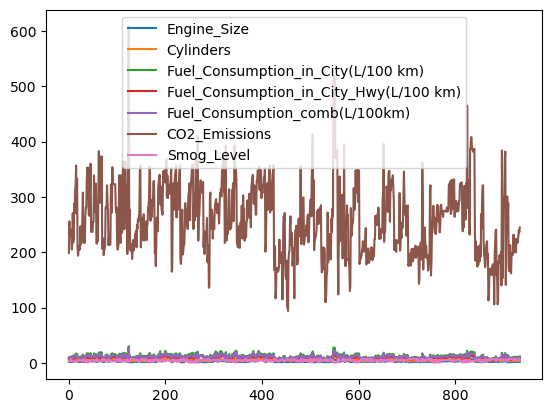

In [6]:
df.plot()

<AxesSubplot:>

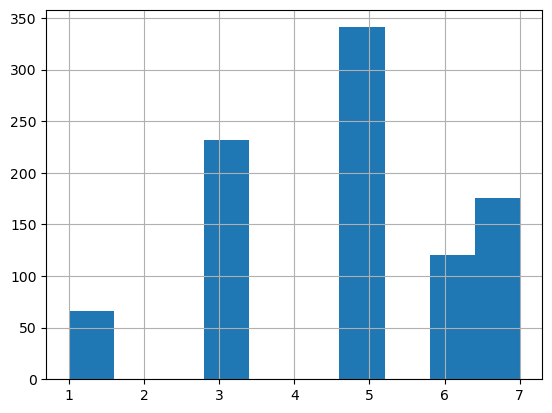

In [7]:
df['Smog_Level'].hist()

<AxesSubplot:>

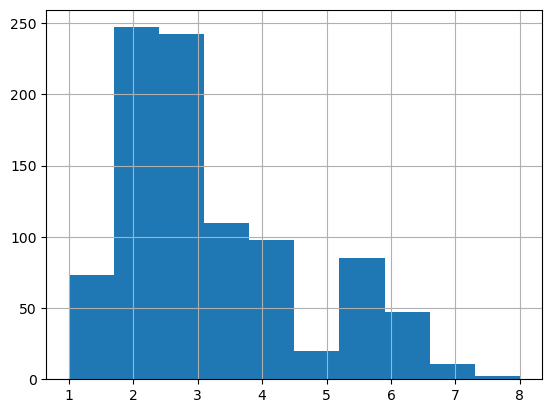

In [8]:
df['Engine_Size'].hist()

<AxesSubplot:>

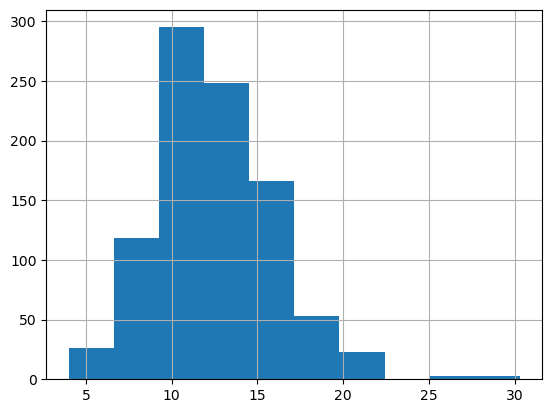

In [9]:
df['Fuel_Consumption_in_City(L/100 km)'].hist()

<AxesSubplot:>

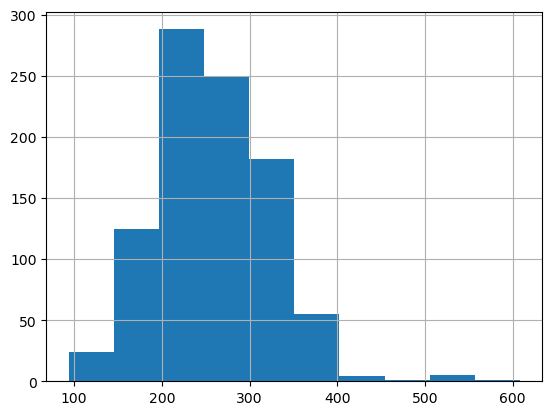

In [10]:
df['CO2_Emissions'].hist()

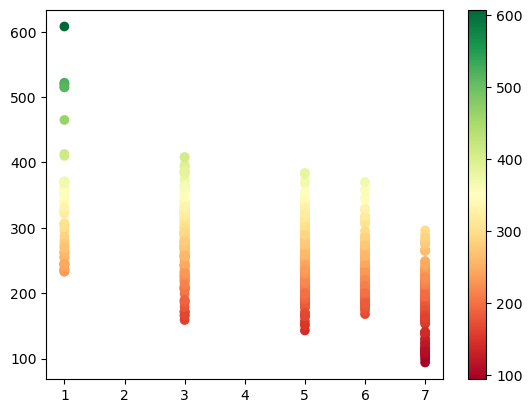

In [11]:
sctr = plt.scatter(x=df['Smog_Level'], y=df['CO2_Emissions'], c=df['CO2_Emissions'], cmap='RdYlGn')
plt.colorbar(sctr, format='%d')

In [12]:
d = df.groupby('CO2_Emissions', sort=True).size().sort_values(ascending = False)
#выводим первые 10
d=d.head(10)
d

CO2_Emissions
214    13
242    13
217    12
275    12
277    12
263    11
323    11
321    11
281    11
268    10
dtype: int64

In [14]:
trace0 = go.Scatter(
    x=d.index,
    y=d.values,
    name='Count'
)

# объединяем графические объекты и задаем title графика в layout
data = [trace0]
layout = {'title': 'Статистика по выбросам CO2'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
#fig.show()
iplot(fig, show_link=False) # не показывать ссылку на экспортирование полотна

In [15]:
# создаем объект для визуализации
trace0 = go.Bar(
    x=d.index,
    y=d.values,
    name='Count'
)

# объединяем графические объекты и задаем title графика в layout
data = [trace0]
layout = {'title': 'Статистика по выбросам CO2', 'xaxis': {'title': 'Выбросы CO2'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [16]:
# создаем ящик с усами для каждого жанра из наших данных
fig = go.Figure()
fig.add_trace(go.Box(x=df['CO2_Emissions'], boxpoints='all'))
fig.show()

In [17]:
fig = go.Figure(data=[go.Histogram(x=df['CO2_Emissions'])])
fig.show()

In [18]:
fig = go.Figure()
fig.add_trace(go.Pie(values=d.values, labels=d.index))
fig.show()